Name: Jinhan Cheng, UNI: jc4834

In [118]:
import sklearn as sk
import sklearn.datasets as skdt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, scale
import seaborn as sns 
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
%matplotlib inline

# 2.1 #

In [119]:
dat = skdt.fetch_covtype()
data=dat['data']
target=dat['target']

In [120]:
data = pd.DataFrame(data)

In [121]:
len(data.columns)

54

Plot distribution of the features

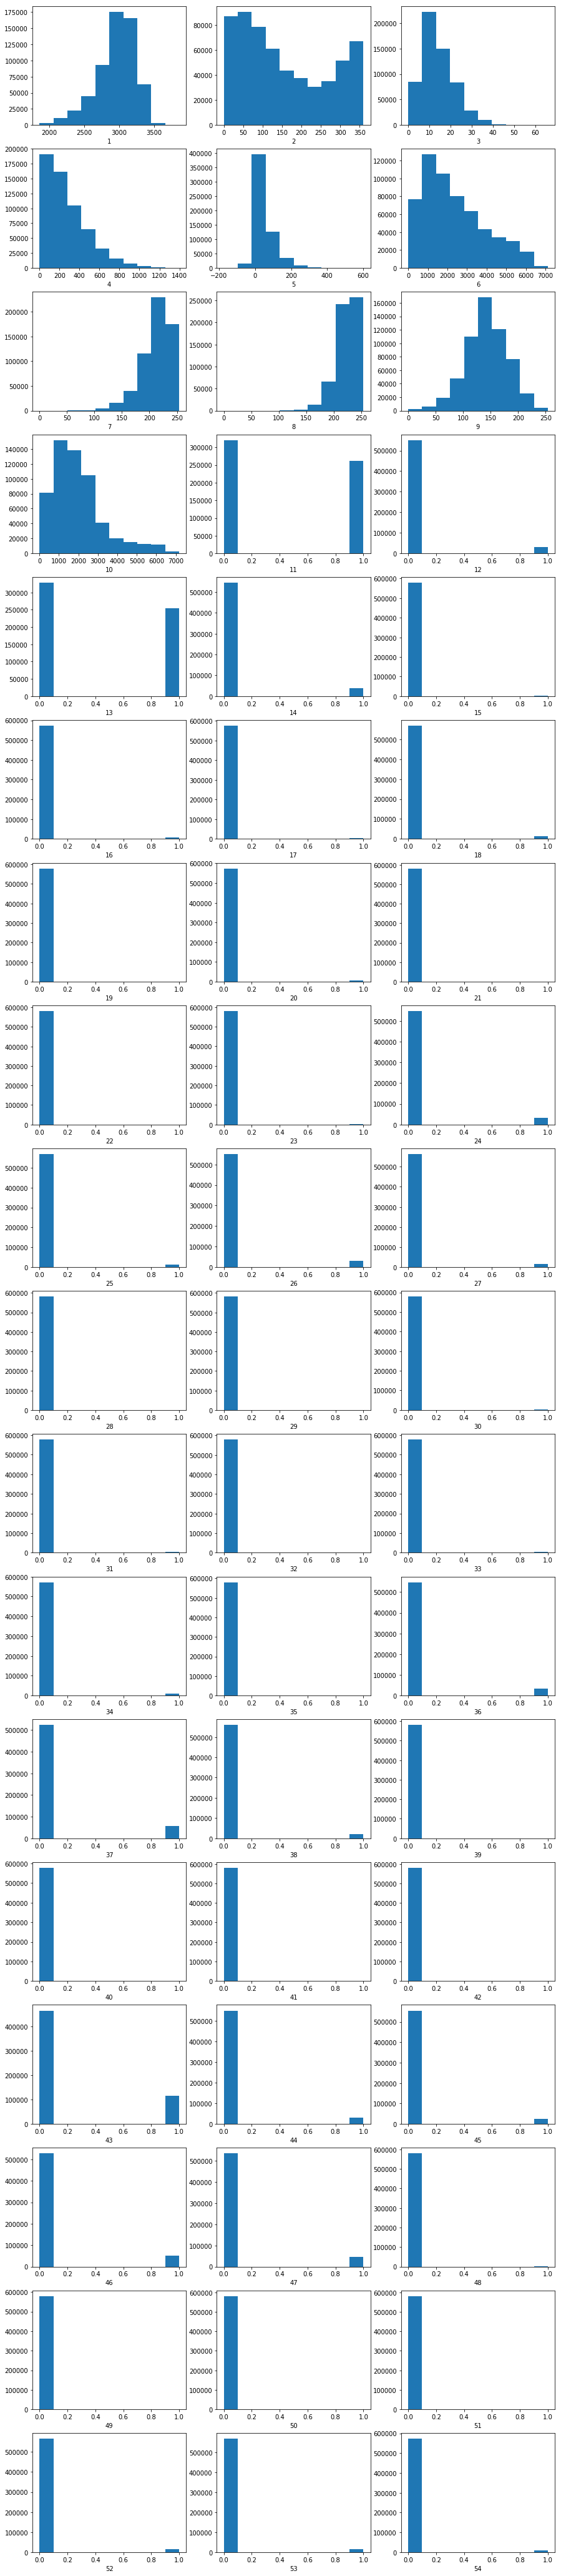

In [122]:
fig, ax=plt.subplots(18,3,figsize=(15,75))
for i in data:
   plt.subplot(18,3,i+1)
   plt.hist(data[i])
   plt.xlabel(i+1)

Plot the distribution of target

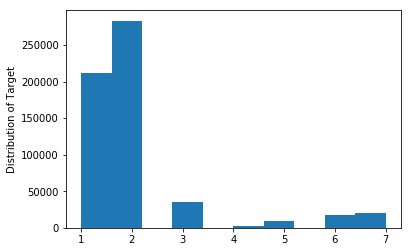

In [13]:
plt.hist(target)
plt.ylabel("Distribution of Target")
plt.show()

# 2.2 #

In [55]:
X,y =dat['data'], dat['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=0)

Score of LogisticRegression using cross-validation 

In [56]:
np.mean(cross_val_score(LogisticRegression(multi_class ='multinomial', solver = 'lbfgs'), X_train, y_train))

0.62424074282040065

Score of LinearSVC using cross-validation

In [57]:
np.mean(cross_val_score(LinearSVC(dual = False, tol = 0.01), X_train, y_train))

0.61895680951584131

Score of NearestCentroid using cross-validation

In [58]:
np.mean(cross_val_score(NearestCentroid(), X_train, y_train))

0.19130487782637784

Scale

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Score of LogisticRegression after scaling

In [60]:
logisticregression = LogisticRegression(multi_class ='multinomial', solver = 'lbfgs').fit(X_train_scaled, y_train)
logisticregression.score(X_test_scaled, y_test)

0.72352656570620999

The score increases after scaling

Score of LinearSVC after scaling

In [61]:
linearsvc = LinearSVC(dual = False, tol = 0.01).fit(X_train_scaled, y_train)
linearsvc.score(X_test_scaled, y_test)

0.71208867283342669

The score increases after scaling

Score of NearestCentroid after scaling

In [62]:
nearestcentroid = NearestCentroid().fit(X_train_scaled, y_train)
nearestcentroid.score(X_test_scaled, y_test)

0.55881593617269476

The score increases after scaling

# 2.3 #

Tune the parameters for LogisticRegression using GridSearchCV

In [67]:
param_grid = {'C': np.logspace(-3,3,20) }
g_Logistic = GridSearchCV(LogisticRegression(multi_class ='multinomial', solver = 'lbfgs'), param_grid, return_train_score=True)
g_Logistic.fit(X_train_scaled, y_train)
print(g_Logistic.best_params_)
print(g_Logistic.best_score_)
g_Logistic.score(X_test_scaled, y_test)

{'C': 12.742749857031322}
0.728145815046


0.72351126673563948

This score increase compared with the results in 2.2 before scaling

Plot, blue line indicates mean_train_score, orange line indicates mean_test_score

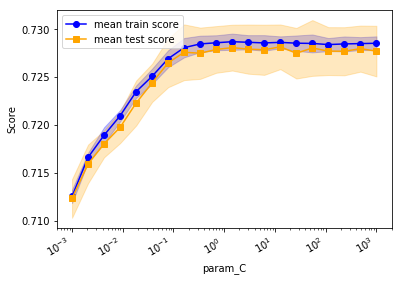

In [69]:
plt.plot(g_Logistic.cv_results_['param_C'], g_Logistic.cv_results_['mean_train_score'], marker = 'o', label="mean train score", color='blue')
plt.fill_between(param_grid['C'], g_Logistic.cv_results_['mean_train_score'] - g_Logistic.cv_results_['std_train_score'], 
                 g_Logistic.cv_results_['mean_train_score'] + g_Logistic.cv_results_['std_train_score'], alpha=0.25, color='blue')

plt.plot(g_Logistic.cv_results_['param_C'], g_Logistic.cv_results_['mean_test_score'], marker = 's', label="mean test score", color='orange')
plt.fill_between(param_grid['C'], g_Logistic.cv_results_['mean_test_score'] - g_Logistic.cv_results_['std_test_score'],
                 g_Logistic.cv_results_['mean_test_score'] + g_Logistic.cv_results_['std_test_score'], alpha=0.25,
                 color="orange")

plt.legend(loc="best")
plt.xticks(rotation=30,ha="right")
plt.xscale("log")
plt.xlabel('param_C')
plt.ylabel('Score')
plt.show()

Tune the parameters for LinearSVC using GridSearchCV

In [70]:
param_grid = {'C' : np.logspace(-2,2,15)}
g_LinearSVC = GridSearchCV(LinearSVC(dual = False, tol = 0.01), param_grid, return_train_score=True)
g_LinearSVC.fit(X_train_scaled, y_train)
print(g_LinearSVC.best_params_)
print(g_LinearSVC.best_score_)
g_LinearSVC.score(X_test_scaled, y_test)

{'C': 13.894954943731374}
0.716166675272


0.71215178108703014

This score increases compared with the results in 2.2 before scaling

Plot, blue line indicates mean_train_score, orange line indicates mean_test_score

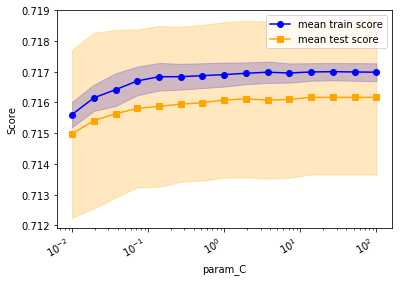

In [73]:
plt.plot(g_LinearSVC.cv_results_['param_C'], g_LinearSVC.cv_results_['mean_train_score'], marker = 'o', label="mean train score", color='blue')
plt.fill_between(param_grid['C'], g_LinearSVC.cv_results_['mean_train_score'] - g_LinearSVC.cv_results_['std_train_score'], 
                 g_LinearSVC.cv_results_['mean_train_score'] + g_LinearSVC.cv_results_['std_train_score'], alpha=0.25, color='blue')

plt.plot(g_LinearSVC.cv_results_['param_C'], g_LinearSVC.cv_results_['mean_test_score'], marker = 's', label="mean test score", color='orange')
plt.fill_between(param_grid['C'], g_LinearSVC.cv_results_['mean_test_score'] - g_LinearSVC.cv_results_['std_test_score'],
                 g_LinearSVC.cv_results_['mean_test_score'] + g_LinearSVC.cv_results_['std_test_score'], alpha=0.25,
                 color="orange")

plt.legend(loc="best")
plt.xticks(rotation=30,ha="right")
plt.xscale("log")
plt.xlabel('param_C')
plt.ylabel('Score')
plt.show()

Tune the parameters for NearestCentroid using GridSearchCV

In [78]:
param_grid = {'shrink_threshold' : [None, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0, 100.0,1000.0]}
g_NearestCentroid = GridSearchCV(NearestCentroid(), param_grid, return_train_score=True)
g_NearestCentroid.fit(X_train_scaled, y_train)
print(g_NearestCentroid.best_params_)
print(g_NearestCentroid.best_score_)
g_NearestCentroid.score(X_test_scaled, y_test)

{'shrink_threshold': 10.0}
0.650315829332


0.6165102665654385

This score increases compared with the results in 2.2 before scaling

Plot, blue line indicates mean_train_score, orange line indicates mean_test_score

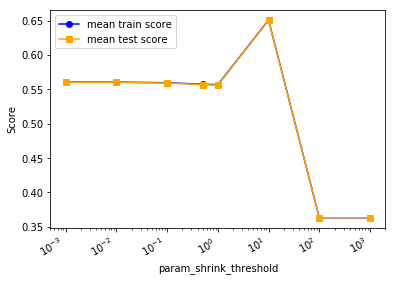

In [99]:
plt.plot(g_NearestCentroid.cv_results_['param_shrink_threshold'], g_NearestCentroid.cv_results_['mean_train_score'], marker = 'o', label="mean train score", color='blue')

plt.plot(g_NearestCentroid.cv_results_['param_shrink_threshold'], g_NearestCentroid.cv_results_['mean_test_score'], marker = 's', label="mean test score", color='orange')

plt.legend(loc="best")
plt.xticks(rotation=30,ha="right")
plt.xscale("log")
plt.xlabel('param_shrink_threshold')
plt.ylabel('Score')
plt.show()

# 2.4 #

In [109]:
kfold1 = KFold(n_splits = 10, random_state = 5, shuffle = False)

In [123]:
param_grid = {'C': np.logspace(-3,3,20) }
kfg_Logistic = GridSearchCV(LogisticRegression(multi_class ='multinomial', solver = 'lbfgs'), param_grid, return_train_score=True, cv=kfold1)
kfg_Logistic.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=5, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   2.06914e-03,   4.28133e-03,   8.85867e-03,
         1.83298e-02,   3.79269e-02,   7.84760e-02,   1.62378e-01,
         3.35982e-01,   6.95193e-01,   1.43845e+00,   2.97635e+00,
         6.15848e+00,   1.27427e+01,   2.63665e+01,   5.45559e+01,
         1.12884e+02,   2.33572e+02,   4.83293e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [ ]:
param_grid = {'C' : np.logspace(-2,2,15)}
kfg_LinearSVC = GridSearchCV(LinearSVC(dual = False, tol = 0.01), param_grid, return_train_score=True, cv=kfold1)
kfg_LinearSVC.fit(X_train_scaled, y_train)

In [ ]:
param_grid = {'shrink_threshold' : [None, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0, 100.0,1000.0]}
kfg_NearestCentroid = GridSearchCV(NearestCentroid(), param_grid, return_train_score=True, cv=kfold1)
kfg_NearestCentroid.fit(X_train_scaled, y_train)

In [106]:
print (kfg_Logistic.best_params_)
print (kfg_LinearSVC.best_params_)
print (kfg_NearestCentroid.best_params_)

AttributeError: 'numpy.float64' object has no attribute 'best_params_'

In [ ]:
kfold2 = KFold(n_splits = 10, random_state = 42, shuffle = True)

In [ ]:
param_grid = {'C': np.logspace(-3,3,20) }
kfsg_Logistic = GridSearchCV(LogisticRegression(multi_class ='multinomial', solver = 'lbfgs'), param_grid, return_train_score=True, cv=kfold2)
kfsg_Logistic.fit(X_train_scaled, y_train)

In [ ]:
param_grid = {'C' : np.logspace(-2,2,15)}
kfsg_LinearSVC = GridSearchCV(LinearSVC(dual = False, tol = 0.01), param_grid, return_train_score=True, cv=kfold2)
kfsg_LinearSVC.fit(X_train_scaled, y_train)

In [ ]:
param_grid = {'shrink_threshold' : [None, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0, 100.0,1000.0]}
kfsg_NearestCentroid = GridSearchCV(NearestCentroid(), param_grid, return_train_score=True, cv=kfold2)
kfsg_NearestCentroid.fit(X_train_scaled, y_train)

In [ ]:
print (kfsg_Logistic.best_params_)
print (kfsg_LinearSVC.best_params_)
print (kfsg_NearestCentroid.best_params_)

The parameters changed

# 2.5 #

In [111]:
lgc = g_Logistic.best_estimator_
lisvc = g_LinearSVC.best_estimator_

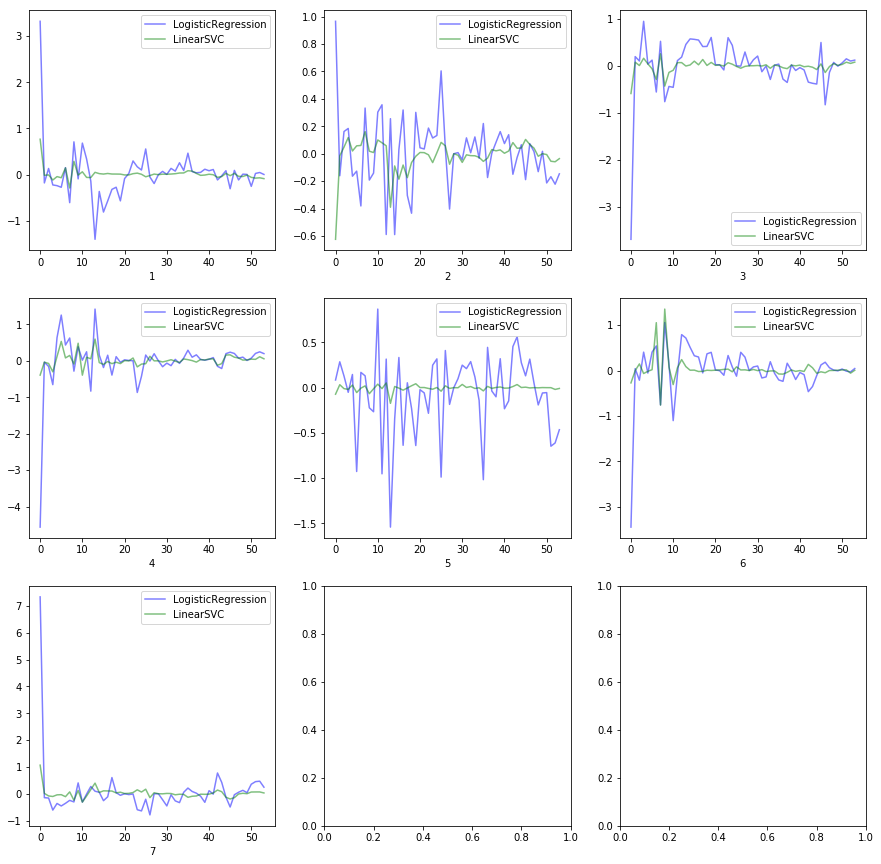

In [117]:
fig, ax = plt.subplots(3,3,figsize = (15,15))
for i in (range(lgc.coef_.shape[0])):
    plt.subplot(3,3,i+1)
    plt.plot(lgc.coef_[i], color="blue", alpha=0.5, label="LogisticRegression")
    plt.plot(lisvc.coef_[i], color="green", alpha=0.5, label="LinearSVC")
    plt.xlabel(i+1)
    plt.legend(loc="best")
plt.show()